In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#normalizing
from sklearn.preprocessing import MinMaxScaler

In [135]:
data=pd.read_csv(r"C:\programming languages\ML with python\cereal-1.csv")

In [136]:
data.shape

(77, 16)

In [137]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [138]:
data.type.unique()

array(['C', 'H'], dtype=object)

In [139]:
cereals=data.drop(columns=['name','rating'])

In [140]:
cereals

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [141]:
cereals=cereals.drop([57])

In [142]:
#label encoding

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

cereals['mfr']=le.fit_transform(cereals['mfr'])
cereals['type']=le.fit_transform(cereals['type'])

In [143]:
cereals.head(2)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,3,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,5,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00


In [144]:
#data to data2

scaler=MinMaxScaler()

#scale data without name and rating

scaler.fit(cereals)
std_x=scaler.transform(cereals)
std_cereals=pd.DataFrame(std_x,columns=cereals.columns)
std_cereals.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,0.500000,0.0,0.181818,0.6,0.2,0.406250,0.714286,0.000000,0.400000,0.848943,0.25,1.0,0.5,0.064
1,0.833333,0.0,0.636364,0.4,1.0,0.046875,0.142857,0.166667,0.533333,0.410876,0.00,1.0,0.5,0.600
2,0.333333,0.0,0.181818,0.6,0.2,0.812500,0.642857,0.111111,0.333333,0.969789,0.25,1.0,0.5,0.064
3,0.333333,0.0,0.000000,0.6,0.0,0.437500,1.000000,0.166667,0.000000,1.000000,0.25,1.0,0.5,0.200
4,1.000000,0.0,0.545455,0.2,0.4,0.625000,0.071429,0.500000,0.533333,0.000000,0.25,1.0,0.5,0.400


In [145]:
#Develop clustering profiles that clearly describe the characteristics of the cereals within the cluster

#K-means

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5,random_state=1)

kmeans.fit(std_cereals)

KMeans(n_clusters=5, random_state=1)

In [146]:
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 3, 4,
       1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 4, 4, 2, 1, 0, 3,
       1, 1, 1, 2, 0, 1, 4, 1, 1, 4, 3, 3, 1, 1, 1, 3, 2, 2, 3, 3, 3, 0,
       2, 3, 4, 4, 4, 4, 0, 2, 2, 2])

In [147]:
y_pred=kmeans.predict(std_cereals)

In [148]:
cereals['cluster_5']=y_pred

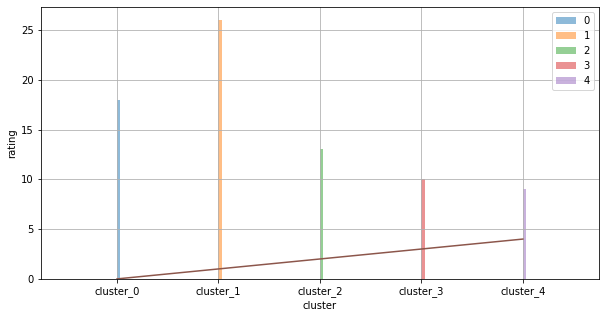

In [149]:
predict_rating=pd.DataFrame(data['rating'].drop(57),columns=['rating'])
predict_rating['cluster_5']=y_pred

predict_rating.groupby('cluster_5')['cluster_5'].hist(bins=30,alpha=0.5,figsize=(10,5),legend=True)  # type: ignore
plt.plot(predict_rating.groupby('cluster_5')['cluster_5'].mean())  # type: ignore   
plt.xticks(range(5),['cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'])  # type: ignore
plt.xlabel('cluster')  # type: ignore
plt.ylabel('rating')  # type: ignore
plt.show()

#rating

1. cluster 4 had lowest rating
2. cluster 1 had highest rating

In [150]:
#k-means for 3

kmeans=KMeans(n_clusters=3,random_state=1)

kmeans.fit(std_cereals)

KMeans(n_clusters=3, random_state=1)

In [151]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 0, 0, 0, 1, 2, 2, 1])

In [152]:
y_pred=kmeans.predict(std_cereals)
cereals['cluster_3']=y_pred
cereals.drop(columns=['cluster_5']).groupby('cluster_3').mean() # type: ignore

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
cluster_3,,,,,,,,,,,,,,
0,2.864865,0.000000,109.459459,2.945946,1.297297,164.054054,3.243243,14.459459,6.837838,134.972973,35.810811,2.945946,1.079730,0.717838
1,2.090909,0.000000,110.454545,1.590909,0.954545,164.545455,0.681818,12.681818,11.090909,48.409091,25.000000,1.681818,1.000000,0.883182
2,3.117647,0.117647,97.058824,2.764706,0.411765,153.235294,1.647059,18.294118,2.176471,72.294118,17.647059,1.352941,0.960588,0.974118


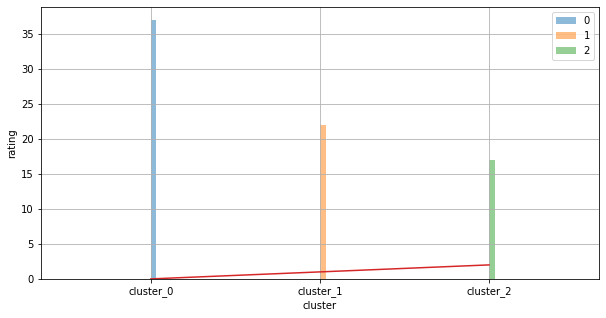

In [153]:
predict_rating=pd.DataFrame(data['rating'].drop(57),columns=['rating'])
predict_rating['cluster_3']=y_pred

predict_rating.groupby('cluster_3')['cluster_3'].hist(bins=30,alpha=0.5,figsize=(10,5),legend=True)  # type: ignore
plt.plot(predict_rating.groupby('cluster_3')['cluster_3'].mean())  # type: ignore   
plt.xticks(range(3),['cluster_0','cluster_1','cluster_2'])  # type: ignore
plt.xlabel('cluster')  # type: ignore
plt.ylabel('rating')  # type: ignore
plt.show()

#rating

1. cluster 0 has highest rating
2. cluster 2 has lowest rating

DBSCAN

In [154]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=3,min_samples=3)
y_dbscan_pred=dbscan.fit_predict(std_cereals)

cereals['cdbscan']=y_dbscan_pred
cereals.drop(columns=['cluster_5','cluster_3']).groupby('cdbscan').mean() # type: ignore

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
cdbscan,,,,,,,,,,,,,,
0,2.697368,0.026316,106.973684,2.513158,1.0,161.776316,2.144737,14.802632,7.026316,95.894737,28.618421,2.223684,1.03,0.823026


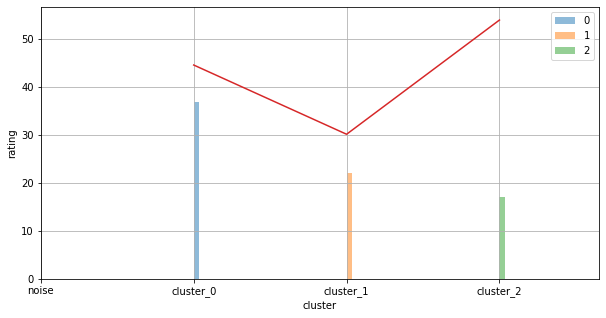

In [155]:
predict_rating=pd.DataFrame(data['rating'].drop(57),columns=['rating'])
predict_rating['cdbscan']=y_dbscan_pred

predict_rating.groupby('cdbscan')['cdbscan'].hist(bins=30,alpha=0.5,figsize=(10,5),legend=True)  # type: ignore
plt.plot(predict_rating.groupby('cdbscan')['rating'].mean())  # type: ignore   
plt.xticks([-1,0,1,2],['noise','cluster_0','cluster_1','cluster_2'])  # type: ignore
plt.xlabel('cluster')  # type: ignore
plt.ylabel('rating')  # type: ignore
plt.show()

agglomerative

In [156]:
from sklearn.cluster import AgglomerativeClustering

agg=AgglomerativeClustering()
y_agg_pred=agg.fit_predict(std_cereals)
cereals['agg']=y_agg_pred
cereals.drop(columns=['cluster_5','cluster_3','cdbscan']).groupby('agg').mean() # type: ignore

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
agg,,,,,,,,,,,,,,
0,2.529412,0.000000,107.058824,2.029412,0.794118,180.294118,1.058824,15.029412,7.823529,58.676471,22.794118,1.441176,0.995000,0.917353
1,2.833333,0.047619,106.904762,2.904762,1.166667,146.785714,3.023810,14.619048,6.380952,126.023810,33.333333,2.857143,1.058333,0.746667


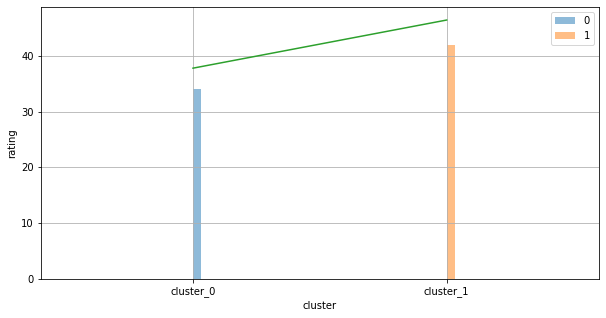

In [157]:
predict_rating=pd.DataFrame(data['rating'].drop(57),columns=['rating'])
predict_rating['agg']=y_agg_pred

predict_rating.groupby('agg')['agg'].hist(bins=30,alpha=0.5,figsize=(10,5),legend=True)  # type: ignore
plt.plot(predict_rating.groupby('agg')['rating'].mean())  # type: ignore   
plt.xticks([0,1],['cluster_0','cluster_1'])  # type: ignore
plt.xlabel('cluster')  # type: ignore
plt.ylabel('rating')  # type: ignore
plt.show()